<a href="https://colab.research.google.com/github/Ujjwal10228/Dog_Vs_Cat_Classification_Using_pretrained_CNN_Model/blob/main/Dog_vs_Cat_Classification_Using_CNN_and_Pretrained_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!ls /root/.kaggle/


kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:26<00:00, 35.2MB/s]
100% 812M/812M [00:26<00:00, 32.7MB/s]


In [ ]:
#Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.7246.jpg', 'dog.7696.jpg', 'dog.587.jpg', 'cat.10599.jpg', 'dog.6093.jpg', 'cat.11113.jpg', 'cat.1607.jpg', 'dog.10270.jpg', 'cat.4813.jpg', 'cat.2178.jpg', 'cat.9184.jpg', 'cat.8305.jpg', 'dog.9781.jpg', 'cat.11985.jpg', 'dog.2175.jpg', 'dog.10805.jpg', 'dog.5570.jpg', 'cat.11935.jpg', 'cat.8978.jpg', 'dog.3694.jpg', 'cat.8784.jpg', 'cat.1488.jpg', 'dog.8855.jpg', 'dog.11735.jpg', 'cat.9807.jpg', 'cat.3007.jpg', 'cat.341.jpg', 'cat.5617.jpg', 'dog.3585.jpg', 'dog.8118.jpg', 'cat.188.jpg', 'dog.2318.jpg', 'dog.2036.jpg', 'cat.267.jpg', 'dog.5095.jpg', 'cat.11314.jpg', 'dog.8681.jpg', 'dog.4070.jpg', 'cat.7873.jpg', 'cat.4671.jpg', 'cat.9358.jpg', 'cat.4283.jpg', 'dog.6316.jpg', 'cat.4467.jpg', 'dog.228.jpg', 'dog.8903.jpg', 'dog.12119.jpg', 'dog.4960.jpg', 'cat.255.jpg', 'cat.7824.jpg', 'cat.11115.jpg', 'dog.2931.jpg', 'cat.657.jpg', 'dog.1428.jpg', 'cat.9870.jpg', 'cat.243.jpg', 'dog.7393.jpg', 'cat.163.jpg', 'cat.9598.jpg', 'dog.9204.jpg', 'dog.2966.jpg', 'cat.6188.jpg', 'dog.8

Importing Libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying Images

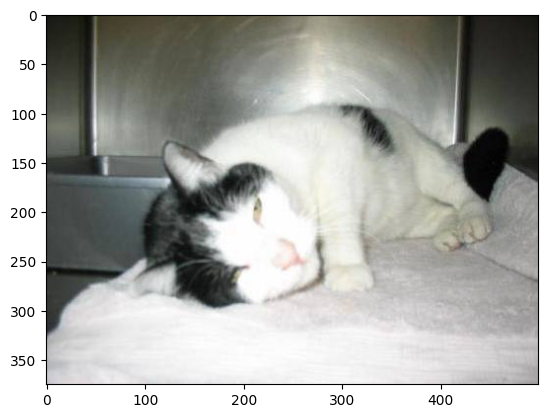

In [ ]:
img = mpimg.imread('/content/train/cat.10659.jpg')
imgplt =plt.imshow(img)
plt.show()

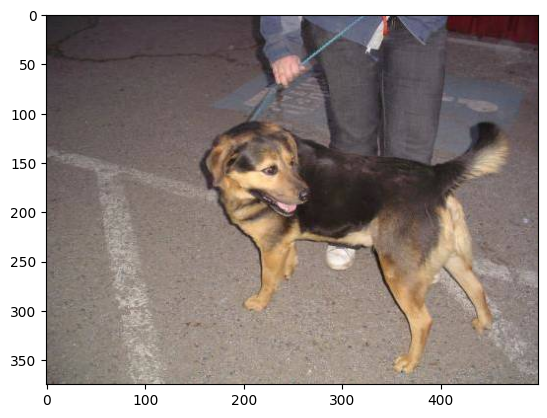

In [ ]:
img = mpimg.imread('/content/train/dog.6758.jpg')
imgplt = plt.imshow(img)
plt.show()

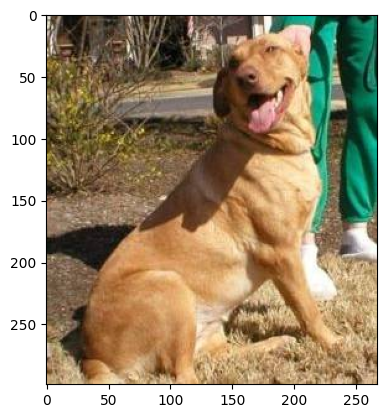

In [ ]:
img = mpimg.imread('/content/train/dog.7079.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count+=1

  else:
    cat_count+=1

print('No. of Dog Images: ', dog_count)
print('No. of Cat Images: ', cat_count)

No. of Dog Images:  12500
No. of Cat Images:  12500


###Resizing all the Images

In [ ]:
#Creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

Creating Labels for resized Images

Cat-->0

Dog-->1

In [ ]:
#Creating a for loop to assign labels
filenames = os.listdir('/content/image resized')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
filenames[0:5], labels[0:5]

(['dog.7246.jpg',
  'dog.7696.jpg',
  'dog.587.jpg',
  'cat.10599.jpg',
  'dog.6093.jpg'],
 [1, 1, 1, 0, 1])

In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
values, counts

(array([0, 1]), array([1005,  995]))

In [ ]:
import cv2
import glob

image_directory = '/content/image resized/'
image_extension = ['png' ,'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 67  93 153]
   [ 96 122 182]
   [117 146 203]
   ...
   [ 37  47  94]
   [ 29  39  86]
   [ 14  24  71]]

  [[ 16  42 102]
   [ 43  71 131]
   [ 77 105 165]
   ...
   [ 43  53 100]
   [ 29  39  86]
   [  7  17  64]]

  [[ 65  93 154]
   [ 53  81 142]
   [ 39  67 128]
   ...
   [ 49  59 107]
   [ 31  41  89]
   [ 12  22  70]]

  ...

  [[ 65  80  99]
   [ 30  44  66]
   [ 18  34  57]
   ...
   [181 193 211]
   [168 178 196]
   [155 167 185]]

  [[ 14  28  50]
   [ 35  49  71]
   [ 66  82 105]
   ...
   [134 144 162]
   [114 122 139]
   [ 91 101 118]]

  [[ 26  40  62]
   [ 90 104 126]
   [110 125 151]
   ...
   [ 91  98 117]
   [ 99 107 124]
   [ 95 103 120]]]


 [[[ 72 176 189]
   [ 85 190 203]
   [ 82 188 199]
   ...
   [117 180 200]
   [110 169 189]
   [ 72 131 150]]

  [[ 76 180 193]
   [ 82 187 200]
   [ 64 170 181]
   ...
   [ 84 145 165]
   [ 91 150 170]
   [ 86 144 163]]

  [[ 82 186 199]
   [ 88 193 206]
   [ 59 164 177]
   ...
   [121 178 199]
   [137 192 213]
   [ 97 153

In [ ]:
X = dog_cat_images
y = np.asarray(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1400, 224, 224, 3), (600, 224, 224, 3))

In [ ]:
X_train = X_train/255
X_test = X_test/255

Building Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)


In [ ]:
num_of_classes = 2

model =tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train,y_train, epochs = 6)

Epoch 1/6
44/44 [==============================] - 14s 52ms/step - loss: 0.2443 - acc: 0.8879
Epoch 2/6
44/44 [==============================] - 2s 40ms/step - loss: 0.0918 - acc: 0.9643
Epoch 3/6
44/44 [==============================] - 2s 42ms/step - loss: 0.0654 - acc: 0.9807
Epoch 4/6
44/44 [==============================] - 2s 43ms/step - loss: 0.0576 - acc: 0.9829
Epoch 5/6
44/44 [==============================] - 2s 39ms/step - loss: 0.0425 - acc: 0.9900
Epoch 6/6
44/44 [==============================] - 2s 40ms/step - loss: 0.0382 - acc: 0.9907


In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

19/19 [==============================] - 1s 41ms/step - loss: 0.0550 - acc: 0.9783
Test Loss = 0.05502781644463539
Test Accuracy = 0.9783333539962769


###Predicting System

Path of the image to be predicted: /content/images_test_cat.jpeg


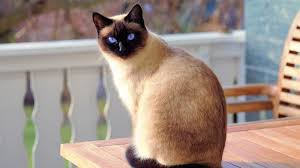

1/1 [==============================] - 0s 25ms/step
The image repesents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_img_resize = cv2.resize(input_image, (224, 224))

input_img_scaled = input_img_resize/255

input_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image repesents a Cat')

else:
  print('The image represents a Dog')